In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import lite
import tensorflow as tf

In [6]:
filename='dataset/trial_covid/cov1.wav'

In [7]:
import IPython.display as ipd
import librosa
import librosa.display

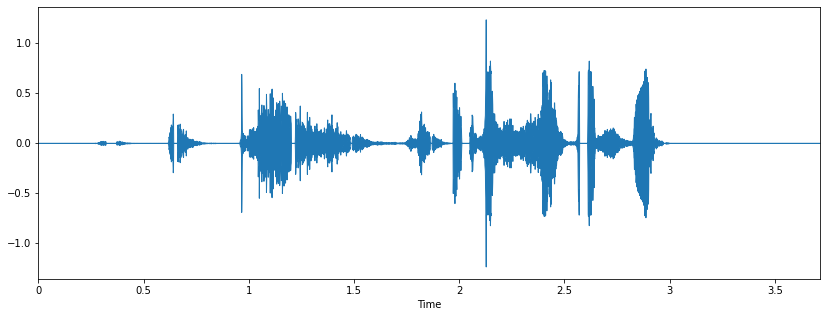

In [8]:
### covid cough  Sound
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [9]:
#feature set
y,sr=librosa.load("dataset/trial_covid/cov1.wav")
mfccs = librosa.feature.mfcc(y, sr, n_mfcc=40)

In [10]:
y,sr=librosa.load("dataset/trial_covid/cov1.wav", sr=None)
print(y.shape)
print(y)
#mfccs = librosa.feature.mfcc(y, sr, n_mfcc=40)

(163840,)
[0. 0. 0. ... 0. 0. 0.]


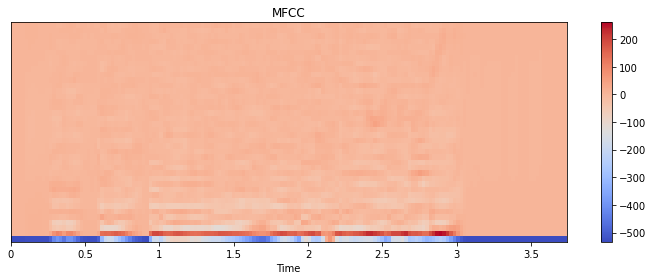

In [11]:
#MFCC trial_covid
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

In [12]:
filename3='dataset/negatif_covid/cp.wav'

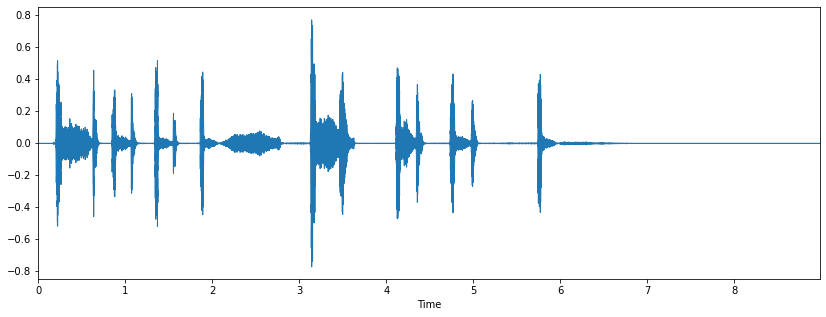

In [13]:
### batuk kering  Sound
plt.figure(figsize=(14,5))
data3,sample_rate3=librosa.load(filename3)
librosa.display.waveplot(data3,sr=sample_rate)
ipd.Audio(filename3)

In [14]:
#feature set
y,sr=librosa.load("dataset/negatif_covid/cp.wav")
mfccs = librosa.feature.mfcc(y, sr, n_mfcc=40)

In [15]:
y,sr=librosa.load("dataset/negatif_covid/cp.wav", sr=None)
print(y.shape)
print(y)
#mfccs = librosa.feature.mfcc(y, sr, n_mfcc=40)

(396288,)
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.0517578e-05
 -3.0517578e-05  4.5776367e-05]


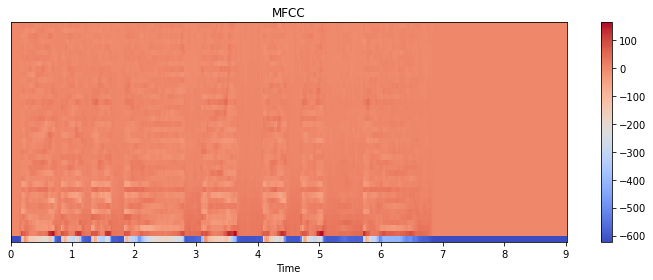

In [16]:
#MFCC trial_covid
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

In [17]:
sample_rate

22050

In [18]:
sample_rate3

22050

# batuk covid

In [19]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [20]:
wave_sample_rate

44100

In [21]:
wave_audio

array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

In [22]:
data

array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        1.4890616e-05,  2.7237539e-07, -2.5290572e-07], dtype=float32)

# Negatif Covid

In [23]:
wave_sample_rate3, wave_audio3=wav.read(filename3)

In [24]:
wave_sample_rate3

44100

In [25]:
wave_audio3

array([[ 1, -1],
       [-2,  2],
       [ 2, -2],
       ...,
       [-2,  4],
       [ 1, -3],
       [ 1,  2]], dtype=int16)

In [26]:
data3

array([ 5.9525166e-07, -8.6625744e-07,  2.7199658e-06, ...,
        3.9463084e-06, -1.1975892e-05,  1.0157366e-05], dtype=float32)

# Penyiapan dataset sound batuk

In [27]:
import librosa
import os
import json

In [28]:

DATASET_PATH = "dataset"
JSON_PATH = "data.json"
SAMPLES_TO_CONSIDER = 22050 # 1 sec. of audio


def preprocess_dataset(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512):
    """Extracts MFCCs from music dataset and saves them into a json file.
    :param dataset_path (str): Path to dataset
    :param json_path (str): Path to json file used to save MFCCs
    :param num_mfcc (int): Number of coefficients to extract
    :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
    :param hop_length (int): Sliding window for FFT. Measured in # of samples
    :return:
    """

    # dictionary where we'll store mapping, labels, MFCCs and filenames
    data = {
        "mapping": [],
        "labels": [],
        "MFCCs": [],
        "files": []
    }

    # loop through all sub-dirs
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're at sub-folder level
        if dirpath is not dataset_path:

            # save label (i.e., sub-folder name) in the mapping
            label = dirpath.split("/")[-1]
            data["mapping"].append(label)
            print("\nProcessing: '{}'".format(label))

            # process all audio files in sub-dir and store MFCCs
            for f in filenames:
                file_path = os.path.join(dirpath, f)

                # load audio file and slice it to ensure length consistency among different files
                signal, sample_rate = librosa.load(file_path)

                # drop audio files with less than pre-decided number of samples
                if len(signal) >= SAMPLES_TO_CONSIDER:

                    # ensure consistency of the length of the signal
                    signal = signal[:SAMPLES_TO_CONSIDER]

                    # extract MFCCs
                    MFCCs = librosa.feature.mfcc(signal, sample_rate, n_mfcc=num_mfcc, n_fft=n_fft,
                                                 hop_length=hop_length)

                    # store data for analysed track
                    data["MFCCs"].append(MFCCs.T.tolist())
                    data["labels"].append(i-1)
                    data["files"].append(file_path)
                    print("{}: {}".format(file_path, i-1))

    # save data in json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)


In [29]:
preprocess_dataset(DATASET_PATH, JSON_PATH)


Processing: 'dataset\negatif_covid'
dataset\negatif_covid\cp.wav: 0

Processing: 'dataset\trial_covid'
dataset\trial_covid\--U7joUcTCo_ 0.000_ 10.000.wav: 1
dataset\trial_covid\-5dCv5_nvU8_ 200.000_ 210.000.wav: 1
dataset\trial_covid\-bZrDCS8KAg_ 70.000_ 80.000.wav: 1
dataset\trial_covid\-ej81N6Aqo4_ 0.000_ 8.000.wav: 1
dataset\trial_covid\-gvLnl1smfs_ 90.000_ 100.000.wav: 1
dataset\trial_covid\-hu5q-Nn4BM_ 70.000_ 80.000.wav: 1
dataset\trial_covid\-jLQkyDhIxw_ 10.000_ 20.000.wav: 1
dataset\trial_covid\-jZav58HEOw_ 50.000_ 60.000.wav: 1
dataset\trial_covid\-Mdd8ysxJ5c_ 10.000_ 20.000.wav: 1
dataset\trial_covid\-o2vmOibWF4_ 310.000_ 320.000.wav: 1
dataset\trial_covid\-OanE09iAA4_ 0.000_ 10.000.wav: 1
dataset\trial_covid\-szeMToBrRE_ 60.000_ 70.000.wav: 1
dataset\trial_covid\-TbcaCBA0pI_ 50.000_ 60.000.wav: 1
dataset\trial_covid\-THYRau6Prs_ 220.000_ 230.000.wav: 1
dataset\trial_covid\-VbTE2bPuyw_ 210.000_ 220.000.wav: 1
dataset\trial_covid\-vu4jJkffMw_ 80.000_ 90.000.wav: 1
dataset\tri

dataset\trial_covid\pos-0421-092-cough-m-53.wav: 1
dataset\trial_covid\pos-0421-093-cough-f-24.wav: 1
dataset\trial_covid\pos-0421-094-cough-m-51.wav: 1
dataset\trial_covid\pos-0422-096-cough-m-31.wav: 1
dataset\trial_covid\_-_5kbw2Mcw_ 0.000_ 10.000.wav: 1
dataset\trial_covid\_0WKVY0n8aE_ 150.000_ 160.000.wav: 1
dataset\trial_covid\_9YKlnmoDjs_ 11.000_ 21.000.wav: 1
dataset\trial_covid\_AjXY9cHCxA_ 150.000_ 160.000.wav: 1
dataset\trial_covid\_D3sxdtbFas_ 40.000_ 50.000.wav: 1
dataset\trial_covid\_dfcXBTcmqU_ 70.000_ 80.000.wav: 1
dataset\trial_covid\_e4GZ6p6nCY_ 20.000_ 30.000.wav: 1
dataset\trial_covid\_FVreKE6Fj8_ 50.000_ 60.000.wav: 1
dataset\trial_covid\_HLvqHDclW8_ 210.000_ 220.000.wav: 1
dataset\trial_covid\_hptdlGvSV4_ 10.000_ 20.000.wav: 1
dataset\trial_covid\_o5xtnLwtRc_ 0.000_ 10.000.wav: 1
dataset\trial_covid\_qDSR5skY0c_ 70.000_ 80.000.wav: 1
dataset\trial_covid\_YqaeNeVQbw_ 20.000_ 30.000.wav: 1
dataset\trial_covid\_zrAnhgYzSo_ 10.000_ 20.000.wav: 1


# Train Dataset Tanpa Tensor Lite 

Training sets loaded!
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 42, 11, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 42, 11, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 6, 64)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 19, 4, 32)         18464     
_________________________________________________________________
batch_normalization_1 (Batch (None, 19, 4, 32)         128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 2, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None

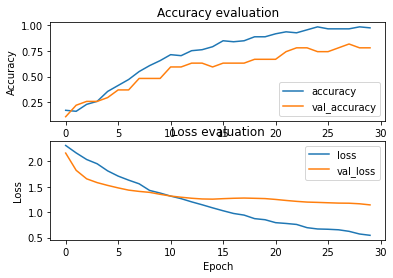

2/2 [==============================] - 0s 3ms/step - loss: 1.3384 - accuracy: 0.7576

Test loss: 1.3384013175964355, test accuracy: 75.75757503509521


In [30]:
import json
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

DATA_PATH = "data.json"
SAVED_MODEL_PATH = "model.h5"
EPOCHS = 40
BATCH_SIZE = 32
PATIENCE = 5
LEARNING_RATE = 0.0001


def load_data(data_path):
    """Loads training dataset from json file.
    :param data_path (str): Path to json file containing data
    :return X (ndarray): Inputs
    :return y (ndarray): Targets
    """
    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["MFCCs"])
    y = np.array(data["labels"])
    print("Training sets loaded!")
    return X, y


def prepare_dataset(data_path, test_size=0.2, validation_size=0.2):
    """Creates train, validation and test sets.
    :param data_path (str): Path to json file containing data
    :param test_size (flaot): Percentage of dataset used for testing
    :param validation_size (float): Percentage of train set used for cross-validation
    :return X_train (ndarray): Inputs for the train set
    :return y_train (ndarray): Targets for the train set
    :return X_validation (ndarray): Inputs for the validation set
    :return y_validation (ndarray): Targets for the validation set
    :return X_test (ndarray): Inputs for the test set
    :return X_test (ndarray): Targets for the test set
    """

    # load dataset
    X, y = load_data(data_path)

    # create train, validation, test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to nd array
    X_train = X_train[..., np.newaxis]
    X_test = X_test[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]

    return X_train, y_train, X_validation, y_validation, X_test, y_test


def build_model(input_shape, loss="sparse_categorical_crossentropy", learning_rate=0.0001):
    """Build neural network using keras.
    :param input_shape (tuple): Shape of array representing a sample train. E.g.: (44, 13, 1)
    :param loss (str): Loss function to use
    :param learning_rate (float):
    :return model: TensorFlow model
    """

    # build network architecture using convolutional layers
    model = tf.keras.models.Sequential()

    # 1st conv layer
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape,
                                     kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2,2), padding='same'))

    # 2nd conv layer
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                                     kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2,2), padding='same'))

    # 3rd conv layer
    model.add(tf.keras.layers.Conv2D(32, (2, 2), activation='relu',
                                     kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2), padding='same'))

    # flatten output and feed into dense layer
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    tf.keras.layers.Dropout(0.3)

    # softmax output layer
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    optimiser = tf.optimizers.Adam(learning_rate=learning_rate)

    # compile model
    model.compile(optimizer=optimiser,
                  loss=loss,
                  metrics=["accuracy"])

    # print model parameters on console
    model.summary()

    return model


def train(model, epochs, batch_size, patience, X_train, y_train, X_validation, y_validation):
    """Trains model
    :param epochs (int): Num training epochs
    :param batch_size (int): Samples per batch
    :param patience (int): Num epochs to wait before early stop, if there isn't an improvement on accuracy
    :param X_train (ndarray): Inputs for the train set
    :param y_train (ndarray): Targets for the train set
    :param X_validation (ndarray): Inputs for the validation set
    :param y_validation (ndarray): Targets for the validation set
    :return history: Training history
    """

    earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor="accuracy", min_delta=0.001, patience=patience)

    # train model
    history = model.fit(X_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_validation, y_validation),
                        callbacks=[earlystop_callback])
    return history


def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
    :param history: Training history of model
    :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="accuracy")
    axs[0].plot(history.history['val_accuracy'], label="val_accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy evaluation")

    # create loss subplot
    axs[1].plot(history.history["loss"], label="loss")
    axs[1].plot(history.history['val_loss'], label="val_loss")
    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel("Loss")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Loss evaluation")

    plt.show()


def main():
    # generate train, validation and test sets
    X_train, y_train, X_validation, y_validation, X_test, y_test = prepare_dataset(DATA_PATH)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape, learning_rate=LEARNING_RATE)

    # train network
    history = train(model, EPOCHS, BATCH_SIZE, PATIENCE, X_train, y_train, X_validation, y_validation)

    # plot accuracy/loss for training/validation set as a function of the epochs
    plot_history(history)

    # evaluate network on test set
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print("\nTest loss: {}, test accuracy: {}".format(test_loss, 100*test_acc))

    # save model
    model.save(SAVED_MODEL_PATH)

    
    
if __name__ == "__main__":
    main()


# Prediksi Tanpa TensorLite

In [31]:
import librosa
import tensorflow as tf
import numpy as np

SAVED_MODEL_PATH = "model.h5"
SAMPLES_TO_CONSIDER = 22050

class _Keyword_Spotting_Service:
    """Singleton class for keyword spotting inference with trained models.
    :param model: Trained model
    """

    model = None
    _mapping = [
        "covid",
        "negatif_covid"
    ]
    _instance = None


    def predict(self, file_path):
        """
        :param file_path (str): Path to audio file to predict
        :return predicted_keyword (str): Keyword predicted by the model
        """

        # extract MFCC
        MFCCs = self.preprocess(file_path)

        # we need a 4-dim array to feed to the model for prediction: (# samples, # time steps, # coefficients, 1)
        MFCCs = MFCCs[np.newaxis, ..., np.newaxis]

        # get the predicted label
        predictions = self.model.predict(MFCCs)
        predicted_index = np.argmax(predictions)
        predicted_keyword = self._mapping[predicted_index]
        return predicted_keyword


    def preprocess(self, file_path, num_mfcc=13, n_fft=2048, hop_length=512):
        """Extract MFCCs from audio file.
        :param file_path (str): Path of audio file
        :param num_mfcc (int): # of coefficients to extract
        :param n_fft (int): Interval we consider to apply STFT. Measured in # of samples
        :param hop_length (int): Sliding window for STFT. Measured in # of samples
        :return MFCCs (ndarray): 2-dim array with MFCC data of shape (# time steps, # coefficients)
        """

        # load audio file
        signal, sample_rate = librosa.load(file_path)

        if len(signal) >= SAMPLES_TO_CONSIDER:
            # ensure consistency of the length of the signal
            signal = signal[:SAMPLES_TO_CONSIDER]

            # extract MFCCs
            MFCCs = librosa.feature.mfcc(signal, sample_rate, n_mfcc=num_mfcc, n_fft=n_fft,
                                         hop_length=hop_length)
        return MFCCs.T


def Keyword_Spotting_Service():
    """Factory function for Keyword_Spotting_Service class.
    :return _Keyword_Spotting_Service._instance (_Keyword_Spotting_Service):
    """

    # ensure an instance is created only the first time the factory function is called
    if _Keyword_Spotting_Service._instance is None:
        _Keyword_Spotting_Service._instance = _Keyword_Spotting_Service()
        _Keyword_Spotting_Service.model = tf.keras.models.load_model(SAVED_MODEL_PATH)
    return _Keyword_Spotting_Service._instance


if __name__ == "__main__":

    # create 2 instances of the keyword spotting service
    kss = Keyword_Spotting_Service()
    kss1 = Keyword_Spotting_Service()

    # check that different instances of the keyword spotting service point back to the same object (singleton)
    assert kss is kss1

    # make a prediction
    keyword = kss.predict("dataset/cp.wav")
    print(keyword)

negatif_covid


In [32]:
from tensorflow.keras import Sequential
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import Model

2.5.0


In [33]:
model=Sequential()

In [34]:
#adding layers and forming the model
model.add(Conv2D(64,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(40,1,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(10,activation="softmax"))

In [35]:
#compiling
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [36]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TF Lite model.
with tf.io.gfile.GFile('test.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\KEVINM~1\AppData\Local\Temp\tmp67vg26py\assets


In [38]:
# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="test.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [39]:
input_details

[{'name': 'conv2d_3_input',
  'index': 0,
  'shape': array([ 1, 40,  1,  1]),
  'shape_signature': array([-1, 40,  1,  1]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

# Train Dataset Tensor Lite

Training sets loaded!
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 42, 11, 64)        640       
_________________________________________________________________
batch_normalization_9 (Batch (None, 42, 11, 64)        256       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 21, 6, 64)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 19, 4, 32)         18464     
_________________________________________________________________
batch_normalization_10 (Batc (None, 19, 4, 32)         128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 10, 2, 32)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (No

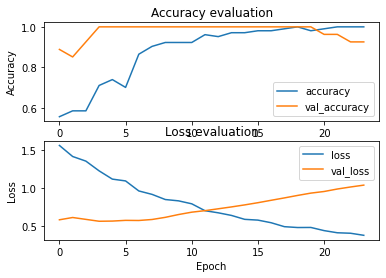

2/2 [==============================] - 0s 3ms/step - loss: 0.8890 - accuracy: 0.9394

Test loss: 0.8889803290367126, test accuracy: 93.9393937587738
INFO:tensorflow:Assets written to: C:\Users\KEVINM~1\AppData\Local\Temp\tmp5vnj59xi\assets


INFO:tensorflow:Assets written to: C:\Users\KEVINM~1\AppData\Local\Temp\tmp5vnj59xi\assets


INFO:tensorflow:Assets written to: model.tflite\assets


INFO:tensorflow:Assets written to: model.tflite\assets


In [42]:
import json
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

DATA_PATH = "data.json"
SAVED_MODEL_PATH = "model.tflite"
EPOCHS = 40
BATCH_SIZE = 32
PATIENCE = 5
LEARNING_RATE = 0.0001


def load_data(data_path):
    """Loads training dataset from json file.
    :param data_path (str): Path to json file containing data
    :return X (ndarray): Inputs
    :return y (ndarray): Targets
    """
    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["MFCCs"])
    y = np.array(data["labels"])
    print("Training sets loaded!")
    return X, y


def prepare_dataset(data_path, test_size=0.2, validation_size=0.2):
    """Creates train, validation and test sets.
    :param data_path (str): Path to json file containing data
    :param test_size (flaot): Percentage of dataset used for testing
    :param validation_size (float): Percentage of train set used for cross-validation
    :return X_train (ndarray): Inputs for the train set
    :return y_train (ndarray): Targets for the train set
    :return X_validation (ndarray): Inputs for the validation set
    :return y_validation (ndarray): Targets for the validation set
    :return X_test (ndarray): Inputs for the test set
    :return X_test (ndarray): Targets for the test set
    """

    # load dataset
    X, y = load_data(data_path)

    # create train, validation, test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to nd array
    X_train = X_train[..., np.newaxis]
    X_test = X_test[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]

    return X_train, y_train, X_validation, y_validation, X_test, y_test


def build_model(input_shape, loss="sparse_categorical_crossentropy", learning_rate=0.0001):
    """Build neural network using keras.
    :param input_shape (tuple): Shape of array representing a sample train. E.g.: (44, 13, 1)
    :param loss (str): Loss function to use
    :param learning_rate (float):
    :return model: TensorFlow model
    """

    # build network architecture using convolutional layers
    model = tf.keras.models.Sequential()

    # 1st conv layer
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape,
                                     kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2,2), padding='same'))

    # 2nd conv layer
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                                     kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2,2), padding='same'))

    # 3rd conv layer
    model.add(tf.keras.layers.Conv2D(32, (2, 2), activation='relu',
                                     kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2), padding='same'))

    # flatten output and feed into dense layer
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    tf.keras.layers.Dropout(0.3)

    # softmax output layer
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    optimiser = tf.optimizers.Adam(learning_rate=learning_rate)

    # compile model
    model.compile(optimizer=optimiser,
                  loss=loss,
                  metrics=["accuracy"])

    # print model parameters on console
    model.summary()

    return model


def train(model, epochs, batch_size, patience, X_train, y_train, X_validation, y_validation):
    """Trains model
    :param epochs (int): Num training epochs
    :param batch_size (int): Samples per batch
    :param patience (int): Num epochs to wait before early stop, if there isn't an improvement on accuracy
    :param X_train (ndarray): Inputs for the train set
    :param y_train (ndarray): Targets for the train set
    :param X_validation (ndarray): Inputs for the validation set
    :param y_validation (ndarray): Targets for the validation set
    :return history: Training history
    """

    earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor="accuracy", min_delta=0.001, patience=patience)

    # train model
    history = model.fit(X_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_validation, y_validation),
                        callbacks=[earlystop_callback])
    return history


def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
    :param history: Training history of model
    :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="accuracy")
    axs[0].plot(history.history['val_accuracy'], label="val_accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy evaluation")

    # create loss subplot
    axs[1].plot(history.history["loss"], label="loss")
    axs[1].plot(history.history['val_loss'], label="val_loss")
    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel("Loss")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Loss evaluation")

    plt.show()


def main():
    # generate train, validation and test sets
    X_train, y_train, X_validation, y_validation, X_test, y_test = prepare_dataset(DATA_PATH)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape, learning_rate=LEARNING_RATE)

    # train network
    history = train(model, EPOCHS, BATCH_SIZE, PATIENCE, X_train, y_train, X_validation, y_validation)

    # plot accuracy/loss for training/validation set as a function of the epochs
    plot_history(history)

    # evaluate network on test set
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print("\nTest loss: {}, test accuracy: {}".format(test_loss, 100*test_acc))

    # save model and convert model to tensorlite
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()  # Save the TF Lite model.
    model.save(SAVED_MODEL_PATH)
    
if __name__ == "__main__":
    main()



# Prediksi menggunakan model tensorlite

In [44]:
import librosa
import tensorflow as tf
import numpy as np

SAVED_MODEL_PATH = "model.tflite"
SAMPLES_TO_CONSIDER = 22050

class _Keyword_Spotting_Service:
    """Singleton class for keyword spotting inference with trained models.
    :param model: Trained model
    """

    model = None
    _mapping = [
        "covid",
        "negatif_covid"
    ]
    _instance = None


    def predict(self, file_path):
        """
        :param file_path (str): Path to audio file to predict
        :return predicted_keyword (str): Keyword predicted by the model
        """

        # extract MFCC
        MFCCs = self.preprocess(file_path)

        # we need a 4-dim array to feed to the model for prediction: (# samples, # time steps, # coefficients, 1)
        MFCCs = MFCCs[np.newaxis, ..., np.newaxis]

        # get the predicted label
        predictions = self.model.predict(MFCCs)
        predicted_index = np.argmax(predictions)
        predicted_keyword = self._mapping[predicted_index]
        return predicted_keyword


    def preprocess(self, file_path, num_mfcc=13, n_fft=2048, hop_length=512):
        """Extract MFCCs from audio file.
        :param file_path (str): Path of audio file
        :param num_mfcc (int): # of coefficients to extract
        :param n_fft (int): Interval we consider to apply STFT. Measured in # of samples
        :param hop_length (int): Sliding window for STFT. Measured in # of samples
        :return MFCCs (ndarray): 2-dim array with MFCC data of shape (# time steps, # coefficients)
        """

        # load audio file
        signal, sample_rate = librosa.load(file_path)

        if len(signal) >= SAMPLES_TO_CONSIDER:
            # ensure consistency of the length of the signal
            signal = signal[:SAMPLES_TO_CONSIDER]

            # extract MFCCs
            MFCCs = librosa.feature.mfcc(signal, sample_rate, n_mfcc=num_mfcc, n_fft=n_fft,
                                         hop_length=hop_length)
        return MFCCs.T


def Keyword_Spotting_Service():
    """Factory function for Keyword_Spotting_Service class.
    :return _Keyword_Spotting_Service._instance (_Keyword_Spotting_Service):
    """

    # ensure an instance is created only the first time the factory function is called
    if _Keyword_Spotting_Service._instance is None:
        _Keyword_Spotting_Service._instance = _Keyword_Spotting_Service()
        _Keyword_Spotting_Service.model = tf.keras.models.load_model(SAVED_MODEL_PATH)
    return _Keyword_Spotting_Service._instance


if __name__ == "__main__":

    # create 2 instances of the keyword spotting service
    kss = Keyword_Spotting_Service()
    kss1 = Keyword_Spotting_Service()

    # check that different instances of the keyword spotting service point back to the same object (singleton)
    assert kss is kss1

    # make a prediction
    keyword = kss.predict("dataset/cp.wav")
    print(keyword)

negatif_covid


In [45]:
# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="test.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [46]:
input_details

[{'name': 'conv2d_3_input',
  'index': 0,
  'shape': array([ 1, 40,  1,  1]),
  'shape_signature': array([-1, 40,  1,  1]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]